In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [10, 10]

In [5]:
crime = pd.read_csv('./result/5대범죄 CCTV.csv', sep=',',encoding='utf8', index_col='구별')
crime.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄 총합,검거율 총합
구별,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,480.252101,114.285714,125.000000,70.561056,90.874159,159842,1471,1.620591,880.973031
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580,135321,1544,1.557245,324.955196
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,133.333333,100.000000,54.454454,89.538310,244953,2063,1.054975,464.458451
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,111.111111,83.333333,52.680412,87.230990,302695,2679,1.215161,406.536298
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,125.000000,53.760000,85.536967,361923,1581,1.680980,425.652278


Pairplot, 각 열의 상관관계와 각각의 도수

- 폭력 - 강도, 폭력 - 살인, 폭력 - 강간, 절도 - 강간의 상관관계가 높다. <br>
- 살인은 강도,강간보다 폭력, 절도와 더 높은 상관관계를 보인다.

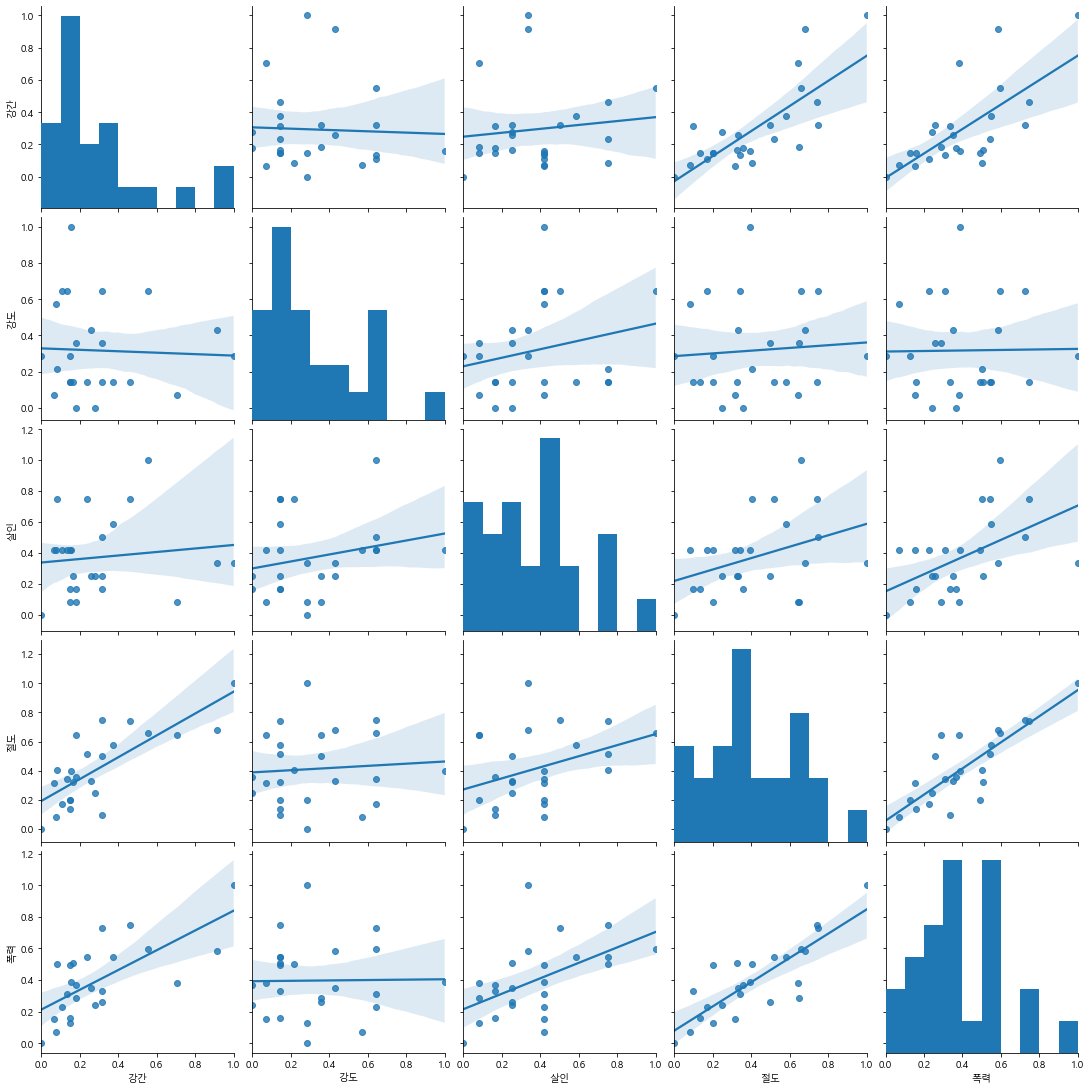

In [7]:
sns.pairplot(crime,  vars = ['강간','강도','살인','절도','폭력'], height=3 , kind = 'reg')
# kind = "reg", 1차 선형회귀선
plt.show()


- 다른 범죄들과 인구수는 양의 상관관계를 보이나 인구수와 강도는 매우 약한 음의 상관관계, 사실상 상관관계가 없어 보인다.
- CCTV는 오히려 약한 음의 상관관계를 보이는 강도를 제외하고 모든 범죄와 양의 상관관계가 나타난다. 이는 CCTV 개수가 많을 수록 범죄 발생 횟수가 적을 것이라는 기대와 충돌한다.

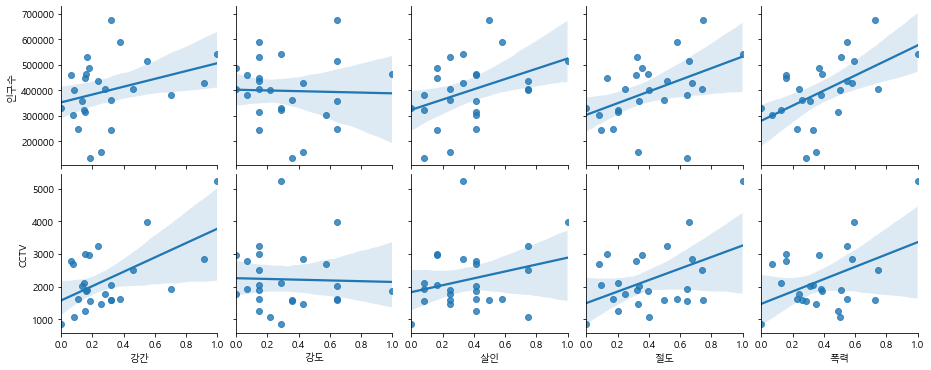

In [9]:
sns.pairplot(crime,  x_vars  = ['강간','강도','살인','절도','폭력'] ,y_vars  = ['인구수', 'CCTV'], kind = 'reg')
plt.show()


- 종로구의 강간 검거율이 압도적으로 나와 이상치를 제거할 필요가 있어 보인다.
- CCTV 개수와 범죄 검거율은 사실상 상관관계가 없어 보인다.

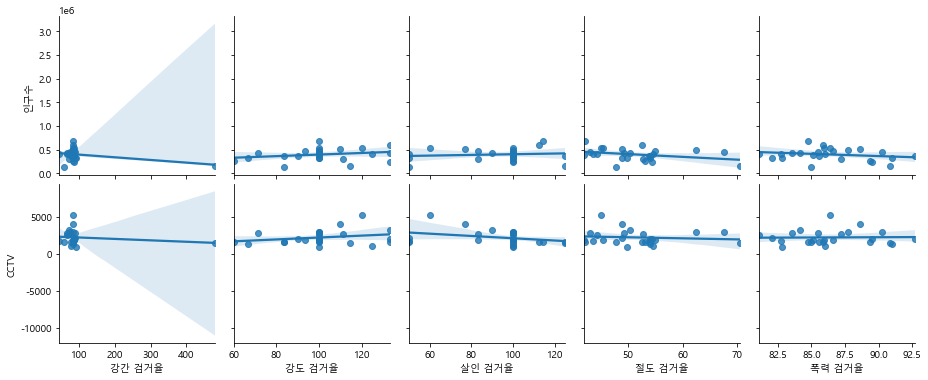

In [11]:
sns.pairplot(crime,  x_vars  = ['강간 검거율','강도 검거율','살인 검거율','절도 검거율','폭력 검거율'] ,y_vars  = ['인구수', 'CCTV'], kind = 'reg')
plt.show()


In [13]:
crime_except = crime.iloc[1:,:]
crime_except.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄 총합,검거율 총합
구별,,,,,,,,,,,,,,
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580,135321,1544,1.557245,324.955196
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,133.333333,100.000000,54.454454,89.538310,244953,2063,1.054975,464.458451
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,111.111111,83.333333,52.680412,87.230990,302695,2679,1.215161,406.536298
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,125.000000,53.760000,85.536967,361923,1581,1.680980,425.652278
동대문구,0.135417,0.642857,0.416667,0.339908,0.309367,85.119048,90.000000,100.000000,54.016982,92.716237,358679,2003,1.844216,421.852267


- 종로구를 제외해도 CCTV 개수와 강간 검거율의 큰 상관관계는 보이지 않는다.

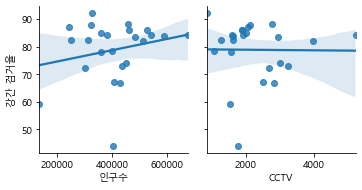

In [15]:
sns.pairplot(crime_except,  x_vars  = ['인구수', 'CCTV'], y_vars  = ['강간 검거율'], kind = 'reg')
plt.show()


## 각 범죄 당 최대 검거율을 가진 구와 다른 구를 비교
- 각 범죄 당 최대 검거율을 가진 구는 각각 다를 수 있다.
- 그러므로 각 행(5개 범죄 검거율)과 열(구)의 검거율을 쉽게 비교할 수 있는 heatmap를 사용한다.

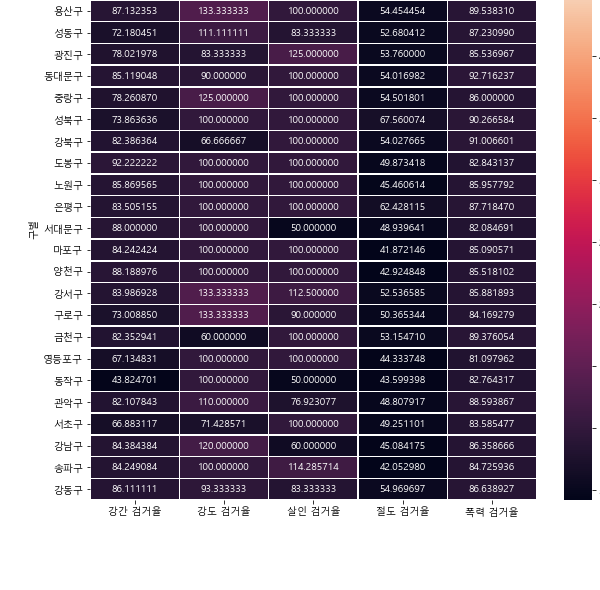

In [17]:
col = ['강간 검거율','강도 검거율','살인 검거율','절도 검거율','폭력 검거율']

sns.heatmap(crime[col] , annot = True, fmt = 'f', linewidths = .5)
# fmt는 integer format의 약자. d는 정수고 f는 float이겠죠?

plt.title('범죄 검거 비율 (정규화된 검거율의 합으로 정렬)')
plt.show()


- 위의 heatmap은 구별 상대비교가 되지 않는다.

## 5대 범죄 검거율 / 범죄 총 발생건수가 제일 높은 구와 낮은 구 구하기


In [19]:
# 총합 검거율의 최댓값
max_detection_rt = crime['검거율 총합'].max()

# 그 최댓값을 기준으로 다른 구의 검거율을 비교할 수 있게 백분율로 나눈다.
crime['검거율 총합 상대비교'] = crime['검거율 총합'] / max_detection_rt * 100
dr_sort = crime.sort_values(by = '검거율 총합 상대비교', ascending = False)
dr_sort.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄 총합,검거율 총합,검거율 총합 상대비교
구별,,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,480.252101,114.285714,125.0,70.561056,90.874159,159842,1471,1.620591,880.973031,100.000000
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,133.333333,112.5,52.536585,85.881893,589536,1617,2.226830,468.238740,53.150179
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,133.333333,100.0,54.454454,89.538310,244953,2063,1.054975,464.458451,52.721075
중랑구,0.083333,0.214286,0.750000,0.401835,0.503698,78.260870,125.000000,100.0,54.501801,86.000000,400989,1068,1.953152,443.762670,50.371879
은평구,0.180556,0.000000,0.166667,0.355505,0.366886,83.505155,100.000000,100.0,62.428115,87.718470,485842,2962,1.069613,433.651739,49.224179


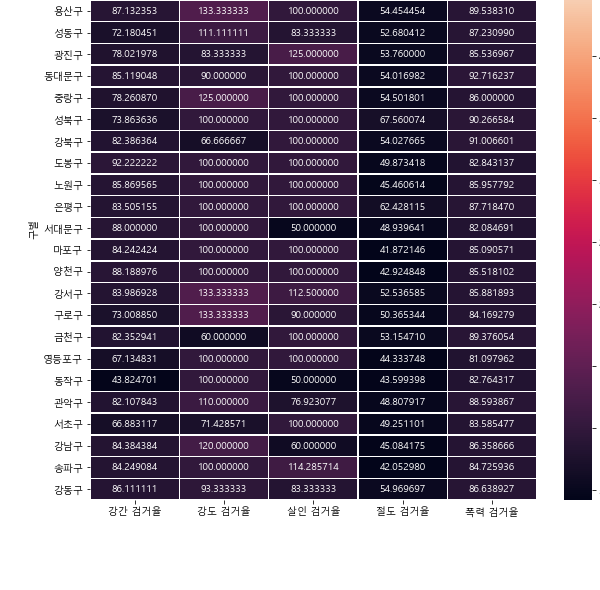

In [11]:
col = ['강간 검거율','강도 검거율','살인 검거율','절도 검거율','폭력 검거율']

sns.heatmap(crime[col] , annot = True, fmt = 'f', linewidths = .5)

plt.title('범죄 검거 비율 (정규화된 검거율의 합으로 정렬)')
plt.show()

In [12]:
# 범죄 총합의 최댓값
max_cr = crime['범죄 총합'].max()

# 그 최댓값을 기준으로 다른 구의 범죄 총합을 비교할 수 있게 백분율로 나눈다.
crime['범죄 총합 상대비교'] = crime['범죄 총합'] / max_cr * 100
cr_sort = crime.sort_values(by = '범죄 총합', ascending = False)
cr_sort.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,CCTV,범죄 총합,검거율 총합,검거율 총합 상대비교,범죄 총합 상대비교
구별,,,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,120.000000,60.000000,45.084175,86.358666,544085,5221,3.619048,395.827225,44.930686,100.000000
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,110.000000,76.923077,48.807917,88.593867,514555,3985,3.448007,406.432704,46.134523,95.273881
서초구,0.913194,0.428571,0.333333,0.678899,0.583402,66.883117,71.428571,100.000000,49.251101,83.585477,429995,2835,2.937400,371.148266,42.129356,81.165003
송파구,0.317708,0.642857,0.500000,0.745872,0.726376,84.249084,100.000000,114.285714,42.052980,84.725936,676673,1586,2.932813,425.313714,48.277722,81.038264
영등포구,0.461806,0.142857,0.750000,0.742661,0.746919,67.134831,100.000000,100.000000,44.333748,81.097962,405982,2495,2.844242,392.566542,44.560563,78.590895


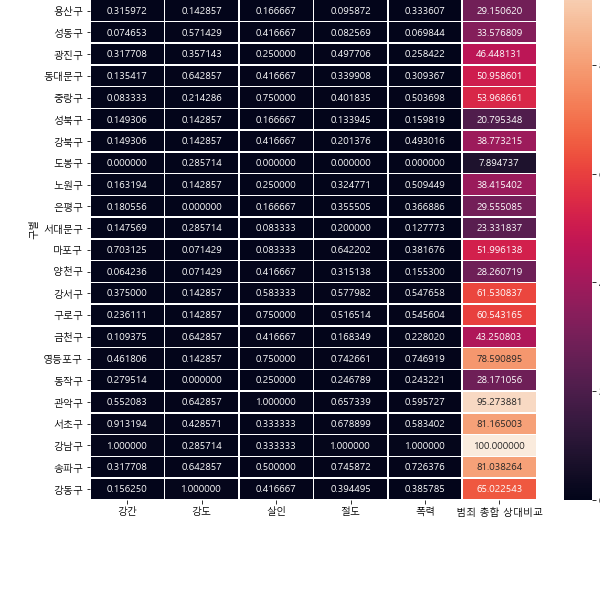

In [13]:
col = ['강간','강도','살인','절도','폭력','범죄 총합 상대비교']

sns.heatmap(crime[col] , annot = True, fmt = 'f', linewidths = .5)

plt.title('범죄 검거 비율 (정규화된 검거율의 합으로 정렬)')
plt.show()

In [14]:
crime.to_csv('./result/구별 상대비교_5대범죄.csv', sep=',',encoding='utf8')

# Folium으로 지도 그리기
- 서울시 구별 경계선을 그릴 수 있는 Json 파일

In [15]:
import json
geo_path = '서울시 구별 경계선.json'
geo_data = json.load(open (geo_path, encoding= 'utf-8'))

In [16]:
import folium

## 살인

In [22]:
murder = folium.Map( [37.5502, 126.982], zoom_start= 11, tiles= 'Stamen Toner' )
murder.choropleth(geo_data = geo_data,
                    data = crime['살인'],
                    columns = [crime.index, crime.살인],
                    fill_color = 'PuRd',
                    key_on = 'id')
murder

## 범죄 총합

In [23]:
total_crime = folium.Map( [37.5502, 126.982], zoom_start= 11, tiles= 'Stamen Toner' )
total_crime.choropleth(geo_data = geo_data,
                    data = crime['범죄 총합'],
                    columns = [crime.index, crime['범죄 총합']],
                    fill_color = 'PuRd',
                    key_on = 'id')
total_crime

- 범죄 총합계를 보는 게 아니라 인구당 비율을 보야아 옳다.
## 인구 당 총 범죄 발생률 

In [28]:
crime['인구 당 총 범죄 발생률'] = crime['범죄 총합'] / crime['인구수'] * 1e5

In [29]:
total_crime_rt = folium.Map( [37.5502, 126.982], zoom_start= 11, tiles= 'Stamen Toner' )
total_crime_rt.choropleth(geo_data = geo_data,
                    data = crime['인구 당 총 범죄 발생률'],
                    columns = [crime.index, crime['인구 당 총 범죄 발생률']],
                    fill_color = 'PuRd',
                    key_on = 'id')
total_crime_rt

## 구별 경찰서 위치와 개수
- KaKao에서는 도로명 주소로 위도, 경도를 가져왔음. 여기선 장소이름
- Googlemaps에서 장소이름으로" 위도, 경도 가져오기

In [30]:
import requests
from urllib.parse import quote
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from tqdm import tqdm

In [31]:
import googlemaps
key_fd = open("./keys/googlemapskey.txt", mode = "r", encoding = "utf8")
kmap_key = key_fd.read(100)
gmaps = googlemaps.Client(key = kmap_key)
key_fd.close()

- 구별 경찰서

In [32]:
police = pd.read_csv('구별 경찰서.csv', sep = ',', encoding='utf8')
police = police[['관서명']]
police

,관서명
0,중부서
1,종로서
2,남대문서
3,서대문서
4,혜화서
5,용산서
6,성북서
7,동대문서
8,마포서
9,영등포서


- 이름 바꿔줘야 제대로 나옴

In [33]:
police = police.apply(lambda r: '서울' + r + '경찰서' ,axis = 1)

In [34]:
result = gmaps.geocode('서울중부경찰서',language = 'ko')
result[0]['geometry']['location']['lat'] , \
result[0]['geometry']['location']['lng'] 

(37.5636465, 126.9895796)

In [35]:
result = gmaps.geocode('서울수서경찰서',language = 'ko')
result

[{'address_components': [{'long_name': '６１７',
    'short_name': '６１７',
    'types': ['premise']},
   {'long_name': '개포로',
    'short_name': '개포로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '개포동',
    'short_name': '개포동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '강남구',
    'short_name': '강남구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '135-240',
    'short_name': '135-240',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 강남구 개포동 개포로 617',
  'geometry': {'location': {'lat': 37.49349, 'lng': 127.0772119},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.4948389802915,
     'lng': 127.0785608802915},
    'southwest': {'lat': 3

In [36]:
lats = [] ; lngs = []

for i in tqdm(police.index):
    try:
        result = gmaps.geocode(police['관서명'][i], language = 'ko')
        lats.append(result[0]['geometry']['location']['lat'])
        lngs.append(result[0]['geometry']['location']['lng'])
    except:
        lats.append(np.nan)
        lngs.append(np.nan)
        print(police[i])

100%|██████████| 31/31 [00:20<00:00,  1.52it/s]


In [37]:
police['lat'] = lats
police['lng'] = lngs
police.to_csv('./result/서울 경찰서 위도, 경도.csv', sep=',',encoding='utf8')
police.head()

,관서명,lat,lng
0,서울중부서경찰서,37.563646,126.989580
1,서울종로서경찰서,37.575558,126.984867
2,서울남대문서경찰서,37.554758,126.973498
3,서울서대문서경찰서,37.564785,126.966776
4,서울혜화서경찰서,37.571853,126.998914


## 구별 인구수 당 총 범죄 발생률 지도에 경찰서 찍기

In [39]:
police_crime = folium.Map( [37.5502, 126.982], zoom_start= 11, tiles= 'Stamen Toner' )

police_crime.choropleth(geo_data = geo_data,
                    data = crime['인구 당 총 범죄 발생률'],
                    columns = [crime.index, crime['인구 당 총 범죄 발생률']],
                    fill_color = 'PuRd',
                    key_on = 'id')

for i in police.index:
    folium.Marker( [police.lat[i], police.lng[i]], 
    popup = police['관서명'][i],
    icon = folium.Icon(color = 'green', icon = 'flag')).add_to(police_crime)

    folium.CircleMarker( [police.lat[i], police.lng[i]] , radius = 15, color = 'green', fill_color = 'blue').add_to(police_crime)

police_crime